In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
nino_file = '/home/548/cd3022/aus-historical-solar-droughts/data/ENSO/nino_3.4.txt'

In [3]:
nino_data = pd.read_csv(nino_file, header=None)

nino_data.rename(columns={0:'start_date', 1:'end_date', 2:'value'}, inplace=True)

nino_data["start_date"] = pd.to_datetime(nino_data["start_date"], format="%Y%m%d")
nino_data["end_date"] = pd.to_datetime(nino_data["end_date"], format="%Y%m%d")

nino_data.set_index('start_date', inplace=True)
nino_data

,end_date,value
start_date,,
2008-07-28,2008-08-03,0.06
2008-08-04,2008-08-10,0.10
2008-08-11,2008-08-17,0.19
2008-08-18,2008-08-24,-0.02
2008-08-25,2008-08-31,-0.07
...,...,...
2025-01-06,2025-01-12,-0.76
2025-01-13,2025-01-19,-0.67
2025-01-20,2025-01-26,-0.86


In [4]:
nino_start = []
nino_end = []
nina_start = []
nina_end = []

for i in range(1, len(nino_data.value)-1):
    if (nino_data.value.iloc[i] < 0.8) and (nino_data.value.iloc[i] > -0.8):
        if nino_data.value.iloc[i+1] >= 0.8:
            nino_start.append(nino_data.index[i+1])
        if nino_data.value.iloc[i+1] <= -0.8:
            nina_start.append(nino_data.index[i+1])

    if (nino_data.value.iloc[i] >= 0.8) and (nino_data.value.iloc[i+1] < 0.8):
        nino_end.append(nino_data.index[i])
    if (nino_data.value.iloc[i] <= -0.8) and (nino_data.value.iloc[i+1] > -0.8):
        nina_end.append(nino_data.index[i])

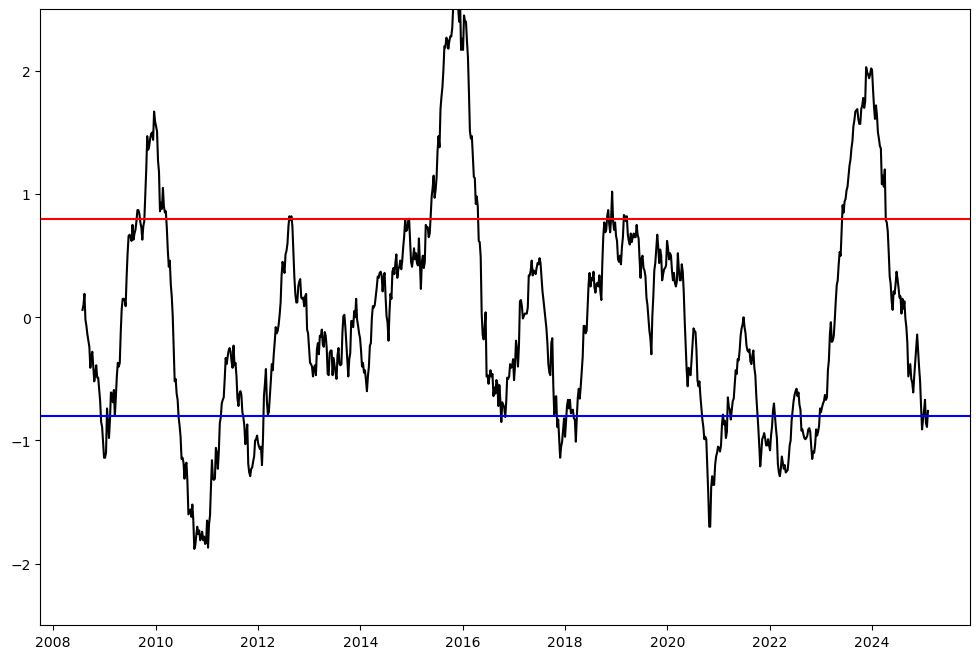

In [5]:
plt.figure(figsize=(12,8))
plt.plot(nino_data.value, color='black')
# plt.xlim(pd.to_datetime('2019-06-01'), pd.to_datetime('2025-02-01'))
plt.ylim(-2.5, 2.5)
plt.axhline(0.8, color='r')
plt.axhline(-0.8, color='b')

In [6]:
nino_end

[Timestamp('2009-09-07 00:00:00'),
 Timestamp('2010-03-15 00:00:00'),
 Timestamp('2012-08-13 00:00:00'),
 Timestamp('2012-08-27 00:00:00'),
 Timestamp('2014-12-15 00:00:00'),
 Timestamp('2016-04-18 00:00:00'),
 Timestamp('2018-11-05 00:00:00'),
 Timestamp('2018-12-03 00:00:00'),
 Timestamp('2019-03-04 00:00:00'),
 Timestamp('2019-03-18 00:00:00'),
 Timestamp('2024-04-01 00:00:00')]